# Future Years

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a FES 2022.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs
import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [3]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data_heat_2022')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat_2022 has buses, generators, lines, links, loads, storage_units


In [4]:
for i in range(29):
    network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus='Heat Bus {}'.format(i+1),
       p_nom_extendable=True,
        ramp_limit_up=1,
        ramp_limit_down=1,
        efficiency=0.80,
        marginal_cost=20.0,
        carrier="heat",
    )

Links need to be scaled up to accomadate for future generation.

In [5]:
contingency_factor = 0.7
network.lines.s_max_pu *= contingency_factor

In [6]:
network.generators

,carrier,type,p_nom,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Drax - coal units,Coal,Conventional steam,1320.000000,Thornton/Drax/Eggborough,NaN,1.00,1.00,1.00,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
West Burton,Coal,Conventional steam,2000.000000,Keadby,NaN,1.00,1.00,1.00,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Ratcliffe,Coal,Conventional steam,2021.000000,Ratcliffe,NaN,1.00,1.00,1.00,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Hartlepool,Nuclear,AGR,1012.327373,Stella West,5.0,0.03,0.03,0.73,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Heysham 1,Nuclear,AGR,905.541785,Penwortham,5.0,0.03,0.03,0.73,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boiler 25,heat,,0.000000,Heat Bus 25,20.0,1.00,1.00,1.00,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 26,heat,,0.000000,Heat Bus 26,20.0,1.00,1.00,1.00,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 27,heat,,0.000000,Heat Bus 27,20.0,1.00,1.00,1.00,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [7]:
network.consistency_check()

In [8]:
network.generators_t.p_max_pu

Generator,Wind Offshore Keadby,Wind Offshore Stella West,Wind Offshore Penwortham,Wind Offshore Neilston,Wind Offshore Torness,Wind Offshore Bramford,Wind Offshore Peterhead,Wind Offshore Deeside,Wind Offshore Walpole,Wind Offshore Kemsley,...,Tidal lagoon S.W.Penisula,Tidal lagoon Deeside,Tidal lagoon Melksham,Tidal stream S.W.Penisula,Tidal stream Neilston,Tidal stream Peterhead,Tidal stream Deeside,Tidal stream Lovedean,Tidal stream Beauly,Wave power Beauly
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1.000000,0.995117,0.999829,1.0,1.000000,0.995777,0.903791,0.986240,0.999883,0.996920,...,0.000000,0.000000,0.000000,0.384986,0.528102,0.000000,0.384986,0.222793,0.000000,0.34667
2022-01-01 01:00:00,1.000000,0.997188,1.000000,1.0,1.000000,0.997815,0.910892,0.999388,1.000000,0.997603,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.384986,0.803177,0.803177,0.222793,0.34667
2022-01-01 02:00:00,1.000000,0.999701,1.000000,1.0,1.000000,0.999426,0.934952,0.999997,1.000000,0.996054,...,0.000000,0.000000,0.026342,0.912560,1.000000,1.000000,0.611344,1.000000,1.000000,0.45200
2022-01-01 03:00:00,1.000000,0.999977,1.000000,1.0,1.000000,0.999200,0.974837,1.000000,1.000000,0.988015,...,0.000000,0.000000,0.000000,0.270388,1.000000,1.000000,0.270388,0.803177,1.000000,0.45200
2022-01-01 04:00:00,1.000000,1.000000,1.000000,1.0,1.000000,0.997808,0.964442,0.999939,1.000000,0.977303,...,0.000000,0.806250,0.000000,0.000000,0.222793,0.803177,0.000000,0.270388,1.000000,0.45200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.997458,0.896438,0.991397,1.0,0.795113,0.999893,0.957313,0.957472,0.997273,1.000000,...,0.683500,0.226778,0.460159,0.066013,0.114070,1.000000,0.000000,0.181139,1.000000,0.25067
2022-12-31 20:00:00,0.859724,0.884008,0.999465,1.0,0.816021,0.999025,0.964889,0.971011,0.862633,0.987612,...,0.169917,0.000000,0.376467,0.000000,0.000000,0.324320,0.000000,0.000000,0.181139,0.25067
2022-12-31 21:00:00,0.621725,0.903212,0.999965,1.0,0.893784,0.989160,0.969399,0.989499,0.614079,0.897459,...,0.000000,0.000000,0.008374,0.270388,0.528102,0.000000,0.270388,0.087863,0.000000,0.34667


In [9]:
#network.model
network.optimize.create_model()

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


Linopy model

Variables:
----------
Dimensions:                      (Generator-ext: 29, StorageUnit-ext: 29,
                                  snapshot: 8760, Generator: 462, Line: 99,
                                  Link: 29, StorageUnit: 149)
Coordinates:
  * Generator-ext                (Generator-ext) object 'boiler 1' ... 'boile...
  * StorageUnit-ext              (StorageUnit-ext) object 'STES_Beauly' ... '...
  * snapshot                     (snapshot) datetime64[ns] 2022-01-01 ... 202...
  * Generator                    (Generator) object 'Drax - coal units' ... '...
  * Line                         (Line) object '0' '1' '2' ... '96' '97' '98'
  * Link                         (Link) object 'heat pump Beauly' ... 'heat p...
  * StorageUnit                  (StorageUnit) object 'Dinorwig' ... 'STES_S_...
Data:
    Generator-p_nom              (Generator-ext) int32 0 1 2 3 4 ... 25 26 27 28
    StorageUnit-p_nom            (StorageUnit-ext) int32 29 30 31 ... 55 56 57
    Gener

In [10]:

#network.model.constraints.remove("Kirchhoff-Voltage-Law")

def remove_kvl(network, sns):
    print("KVL removed!")
    network.model.constraints.remove("Kirchhoff-Voltage-Law")

network.optimize(solver_name='gurobi',extra_functionality=remove_kvl)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
INFO:linopy.model: Solve linear problem using Gu

KVL removed!


Writing variables.: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.18s/it]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29


Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-w2__i83m.lp
Reading time = 43.96 seconds
obj: 28074934 rows, 9084179 columns, 50000083 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 28074934 rows, 9084179 columns and 50000083 nonzeros
Model fingerprint: 0xbd5be923
Coefficient statistics:
  Matrix range     [7e-01, 3e+03]
  Objective range  [1e+00, 1e+09]
  Bounds range     [1e+07, 1e+07]
  RHS range        [2e-07, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 25376868 rows and 1094910 columns (presolve time = 6s) ...
Presolve removed 25376868 rows and 1108514 columns (presolve time = 10s) ...
Presolve removed 25377061 rows and 3128463 columns (presolve tim

  87   1.09512420e+11  1.09423745e+11  8.06e-07 3.66e-06  7.54e+00   596s
  88   1.09509979e+11  1.09426426e+11  6.94e-07 3.45e-06  7.11e+00   603s
  89   1.09507965e+11  1.09431964e+11  7.83e-07 3.03e-06  6.46e+00   609s
  90   1.09506139e+11  1.09435435e+11  9.72e-07 2.76e-06  6.01e+00   616s
  91   1.09505505e+11  1.09435573e+11  9.97e-07 2.75e-06  5.95e+00   621s
  92   1.09503408e+11  1.09437585e+11  9.78e-07 2.42e-06  5.60e+00   627s
  93   1.09502324e+11  1.09438570e+11  8.63e-07 2.27e-06  5.42e+00   632s
  94   1.09500744e+11  1.09439728e+11  1.21e-06 2.09e-06  5.19e+00   639s
  95   1.09498454e+11  1.09442156e+11  1.23e-06 1.93e-06  4.79e+00   646s
  96   1.09495710e+11  1.09443934e+11  1.19e-06 1.67e-06  4.40e+00   653s
  97   1.09494837e+11  1.09446644e+11  1.12e-06 1.51e-06  4.10e+00   660s
  98   1.09493685e+11  1.09447660e+11  1.05e-06 1.36e-06  3.91e+00   667s
  99   1.09492657e+11  1.09449911e+11  9.33e-07 1.24e-06  3.63e+00   674s
 100   1.09490879e+11  1.09451026e+11 


  Push phase complete: Pinf 1.9895026e-06, Dinf 6.1591046e+03   1398s

Iteration    Objective       Primal Inf.    Dual Inf.      Time
 4106217    1.0947288e+11   0.000000e+00   6.159105e+03   1399s
 4109923    1.0947288e+11   1.989499e-06   0.000000e+00   1401s

Solved with barrier
 4109925    1.0947288e+11   0.000000e+00   0.000000e+00   1414s

Solved in 4109925 iterations and 1413.83 seconds (1054.18 work units)
Optimal objective  1.094728807e+11


INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9084179 primals, 28074934 duals
Objective: 1.09e+11
Solver model: available
Solver message: 2



('ok', 'optimal')

In [11]:
#network.optimize.solve_model()

## Running the optimisation

In [12]:
#network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)
#network.optimize(solver_name='gurobi')  # 

In [13]:
network.generators.p_nom_opt.div(1e3) # GW  optimised capacity of generators in GW
network.storage_units.p_nom_opt.div(1e3)  # GW 
#My_network.links_t.efficiency 
network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1431.724138,Pumped Storage Hydroelectric,0.0,5.808138,0.865,0.865,8.315652e+03,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1431.724138
Ffestiniog,298.275862,Pumped Storage Hydroelectric,0.0,4.289375,0.850,0.850,1.279417e+03,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,298.275862
Cruachan,440.000000,Pumped Storage Hydroelectric,0.0,17.797212,0.865,0.865,7.830773e+03,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,440.000000
Foyers,300.000000,Pumped Storage Hydroelectric,0.0,23.161964,0.865,0.865,6.948589e+03,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,300.000000
Beauly Battery,69.231494,Battery,0.0,1.253543,0.950,0.950,8.678465e+01,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,69.231494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STES_London,504.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 25,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,2427.393887
STES_Kemsley,505.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 26,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318
STES_Sellindge,506.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 27,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318


In [14]:
network.storage_units.index[120:150]
#network.storage_units.p_nom_opt[4:33].div(1e3).values

Index(['STES_Beauly', 'STES_Peterhead', 'STES_Errochty',
       'STES_Denny/BonnyBdige', 'STES_Neilston', 'STES_Strathaven',
       'STES_Torness', 'STES_Eccles', 'STES_Harker', 'STES_Stella West',
       'STES_Penwortham', 'STES_Deeside', 'STES_Daines',
       'STES_Marsh_Stocksbridge', 'STES_Thornton_Drax_Eggborough',
       'STES_Keadby', 'STES_Ratcliffe', 'STES_Feckenham', 'STES_Walpole',
       'STES_Bramford', 'STES_Pelham', 'STES_Sundon_East_Claydon',
       'STES_Melksham', 'STES_Bramley', 'STES_London', 'STES_Kemsley',
       'STES_Sellindge', 'STES_Lovedean', 'STES_S_W_Penisula'],
      dtype='object', name='StorageUnit')

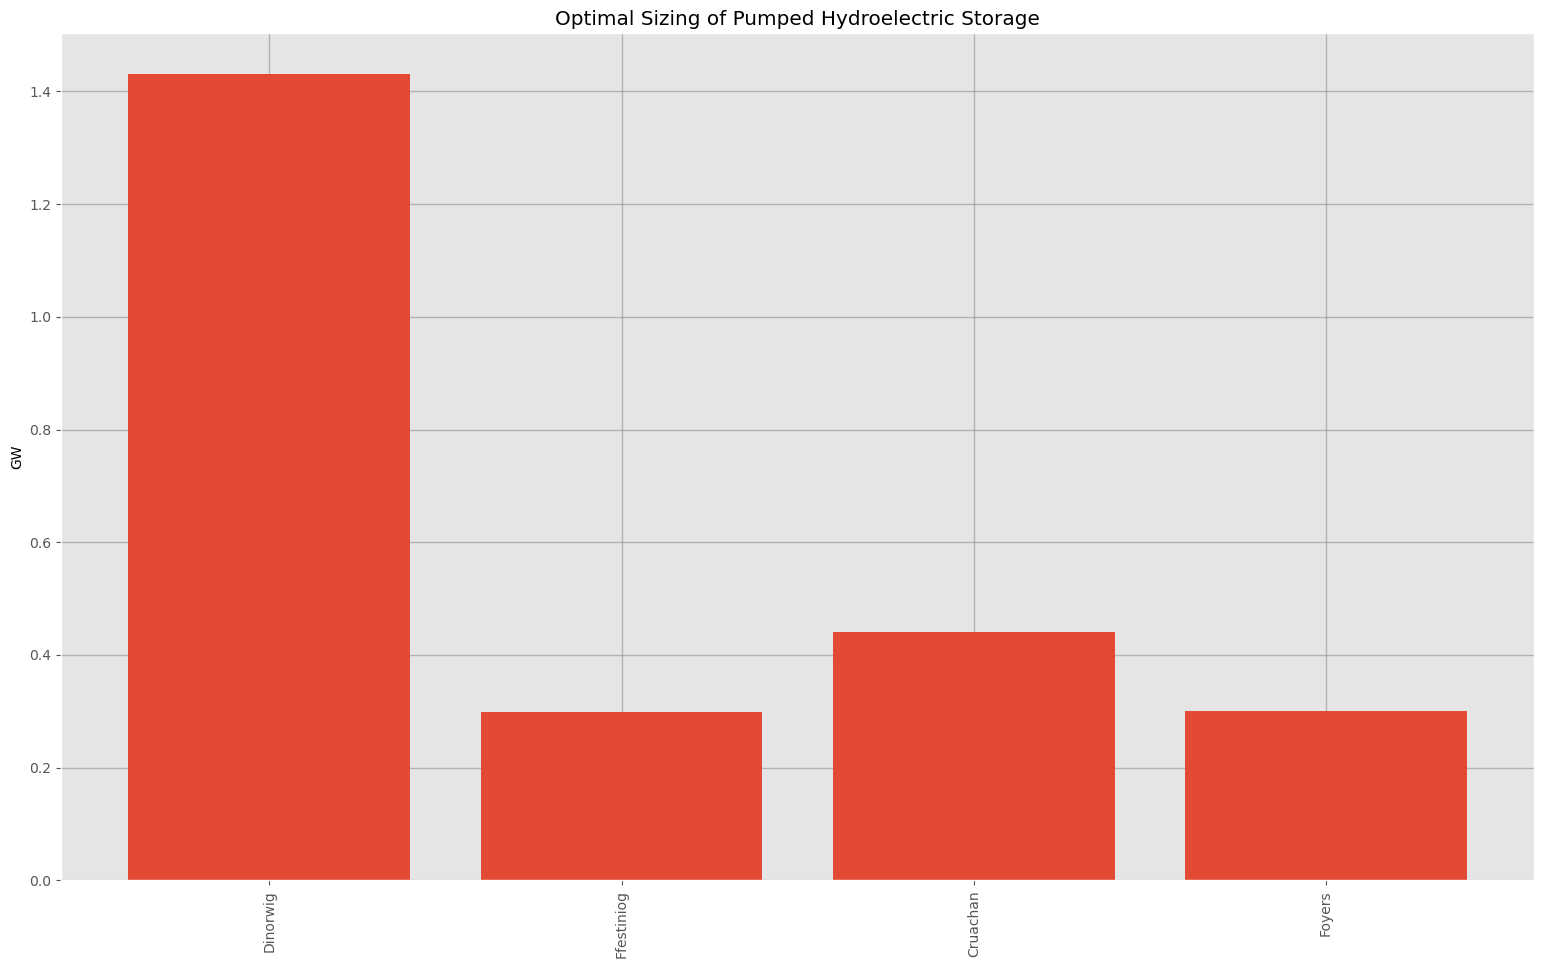

In [15]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[:4], network.storage_units.p_nom_opt[:4].div(1e3).values)

plt.xticks(network.storage_units.index[:4], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Optimal Sizing of Pumped Hydroelectric Storage')
plt.show()

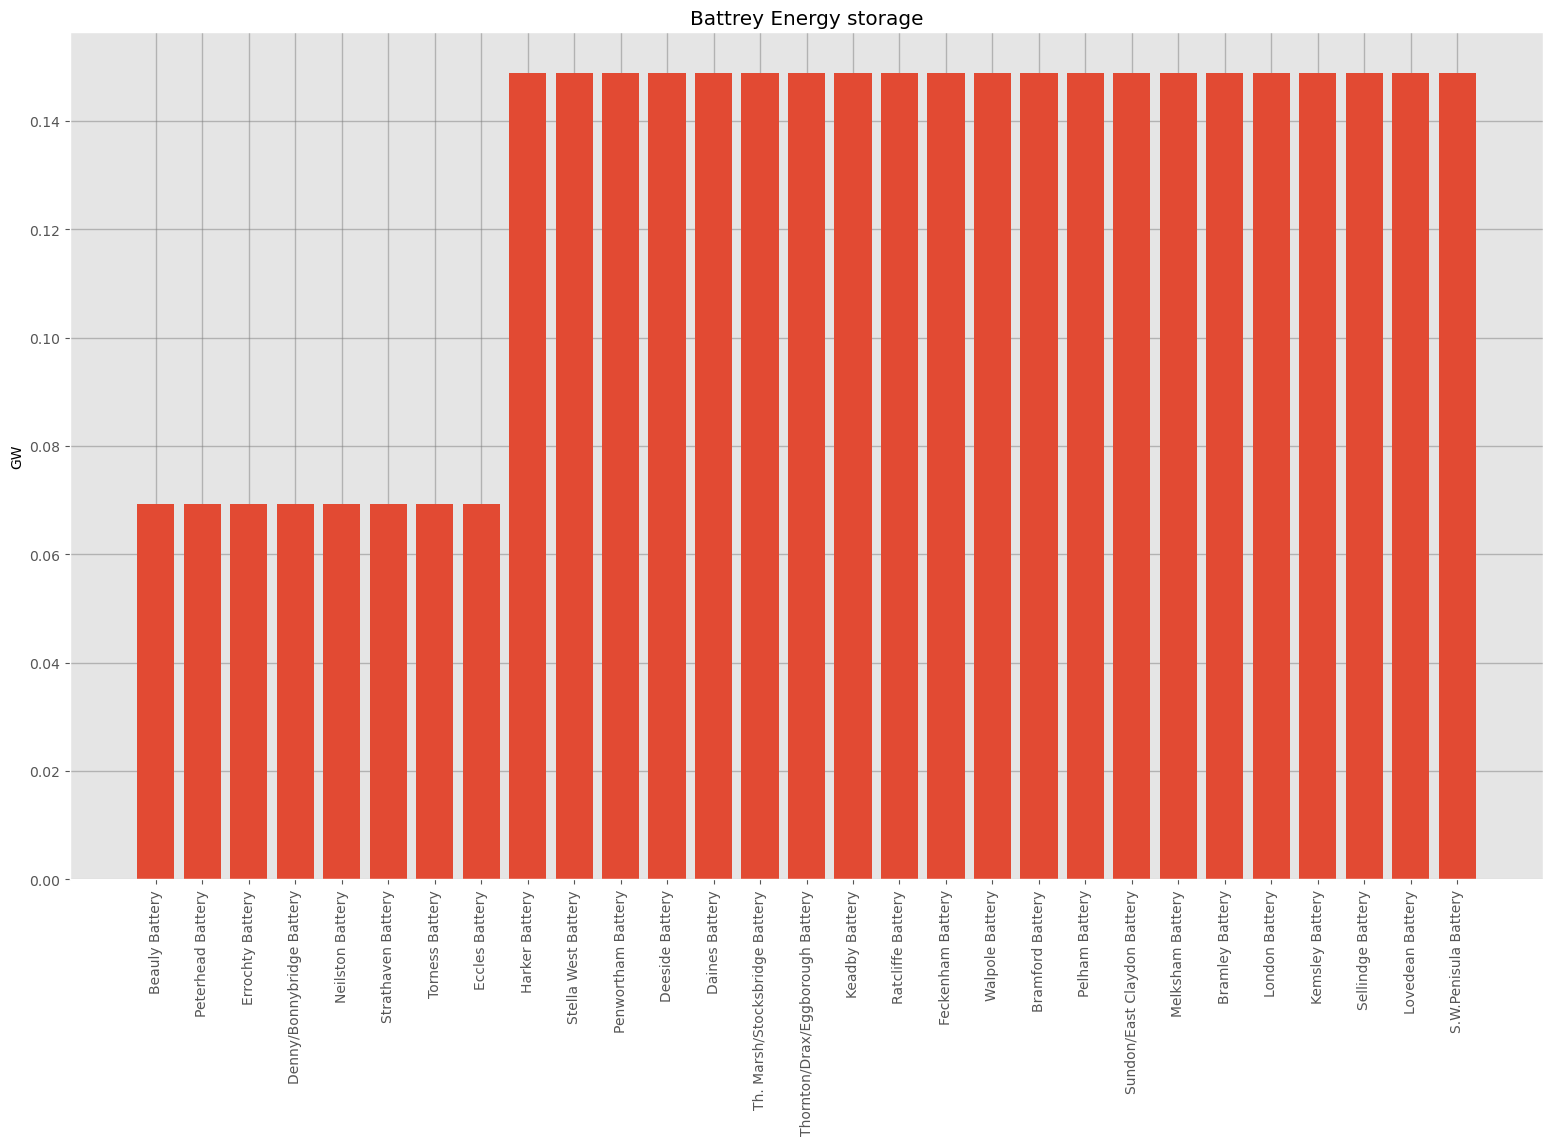

In [16]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[4:33], network.storage_units.p_nom_opt[4:33].div(1e3).values)

plt.xticks(network.storage_units.index[4:33], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Battrey Energy storage')
plt.show()

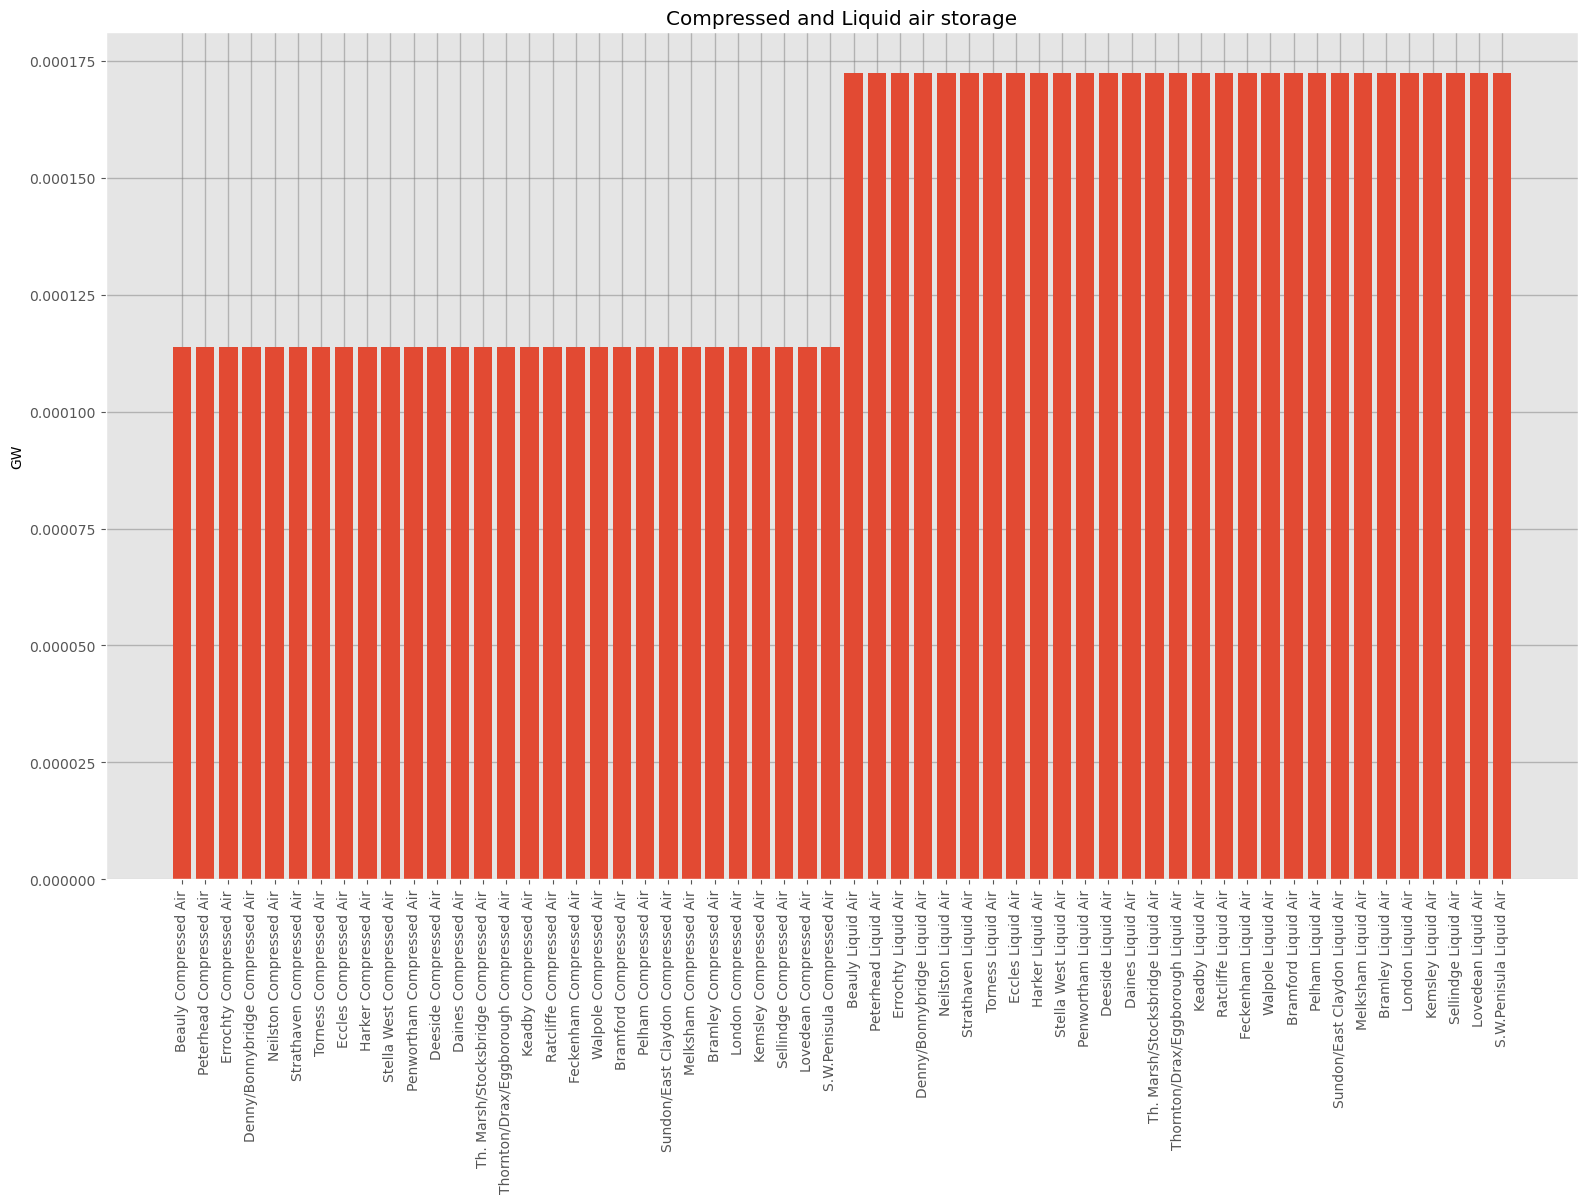

In [17]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[33:91], network.storage_units.p_nom_opt[33:91].div(1e3).values)

plt.xticks(network.storage_units.index[33:91], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Compressed and Liquid air storage')
plt.show()

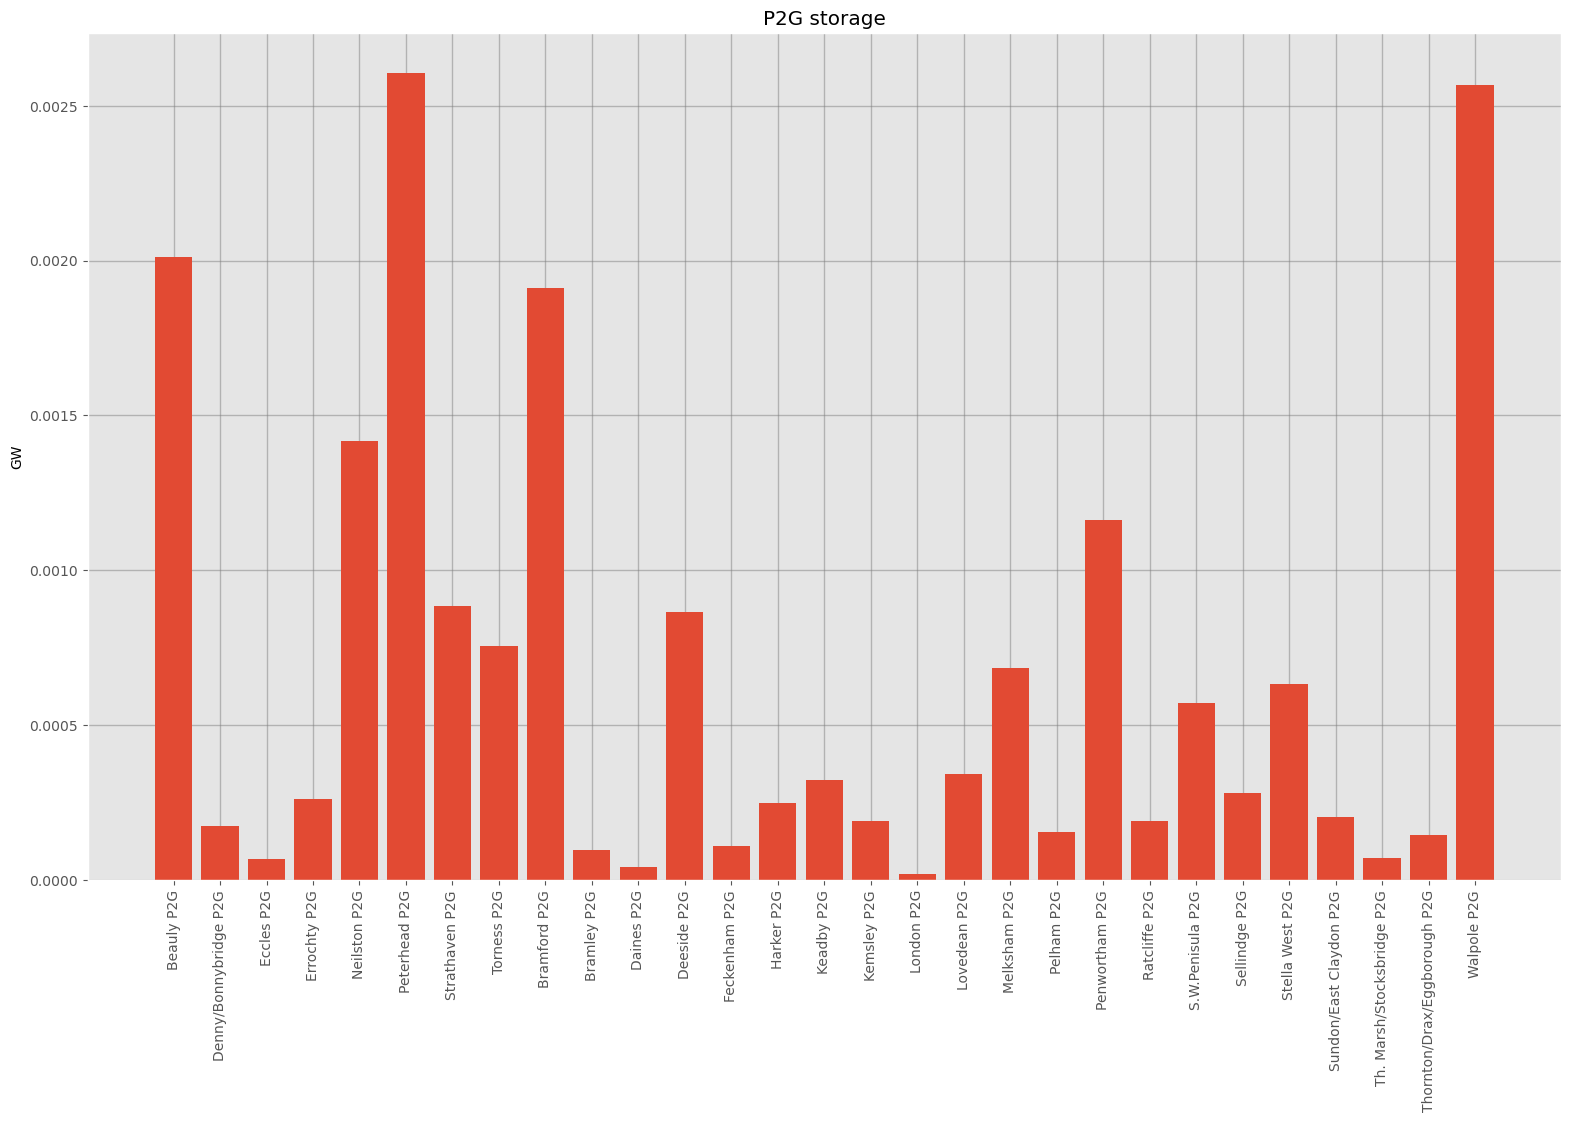

In [18]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[91:120], network.storage_units.p_nom_opt[91:120].div(1e3).values)

plt.xticks(network.storage_units.index[91:120], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('P2G storage')
plt.show()

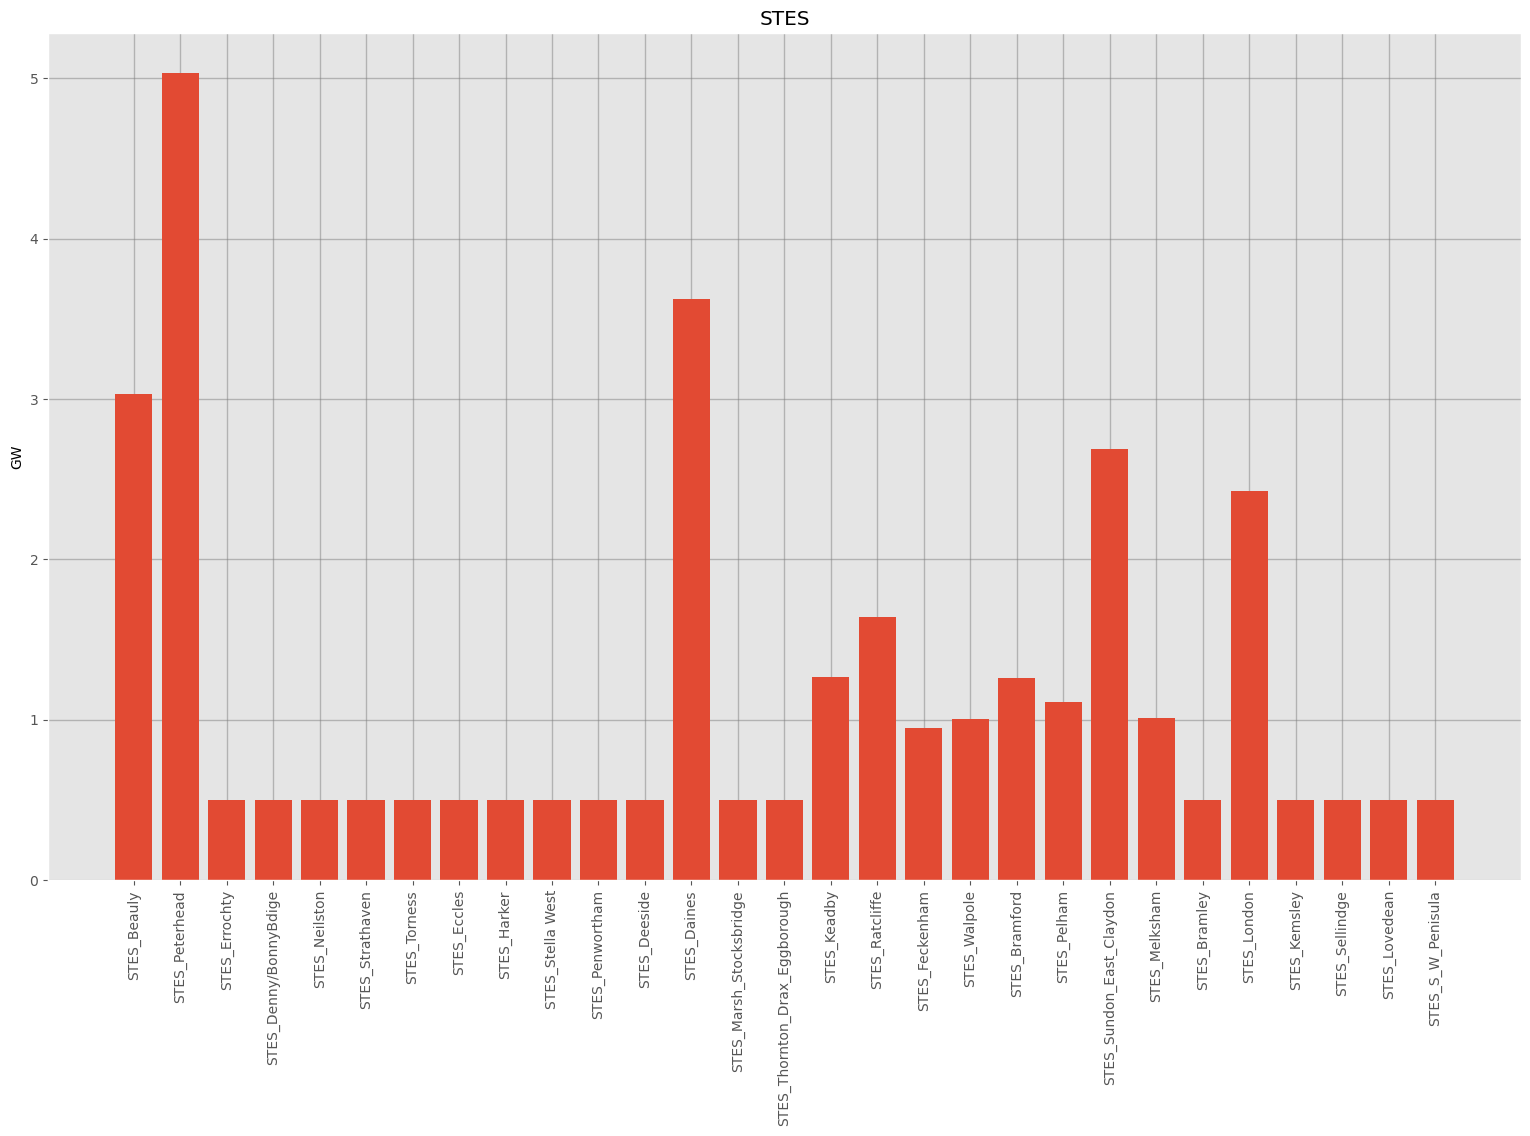

In [19]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[120:150], network.storage_units.p_nom_opt[120:150].div(1e3).values)

plt.xticks(network.storage_units.index[120:150], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('STES')
plt.show()

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [20]:
year=2022

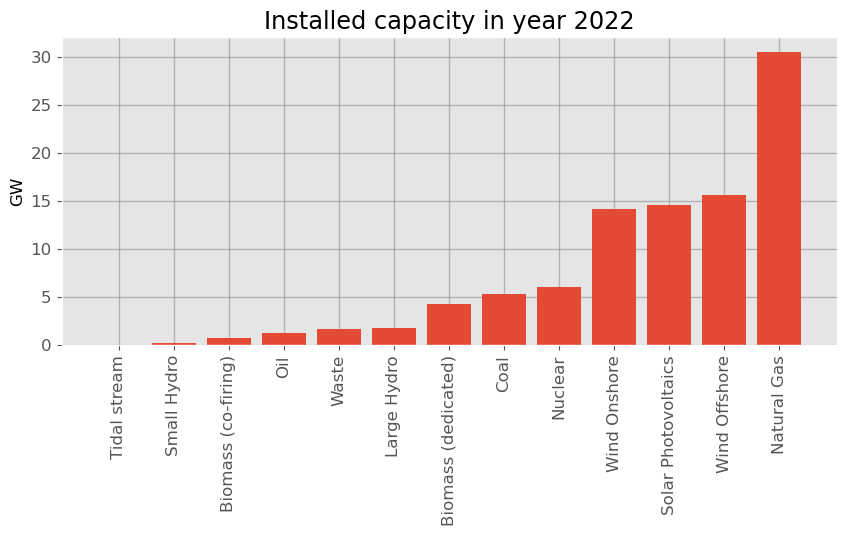

In [21]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

#imp = network.links_t.p0.copy()
#imp[imp < 0] = 0
#imp['Interconnectors Import'] = imp.sum(axis=1)
#interconnector_import = imp[['Interconnectors Import']]

#p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

#exp = network.links_t.p0.copy()
#exp[exp > 0] = 0
#exp['Interconnectors Export'] = exp.sum(axis=1)
#interconnector_export = exp[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

generators_p_nom = network.generators.p_nom.groupby(
    network.generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 12})
# bar chart
plt.figure(figsize=(10,4))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

Graph the power output of the different generation types...

Text(0.5, 0, '')

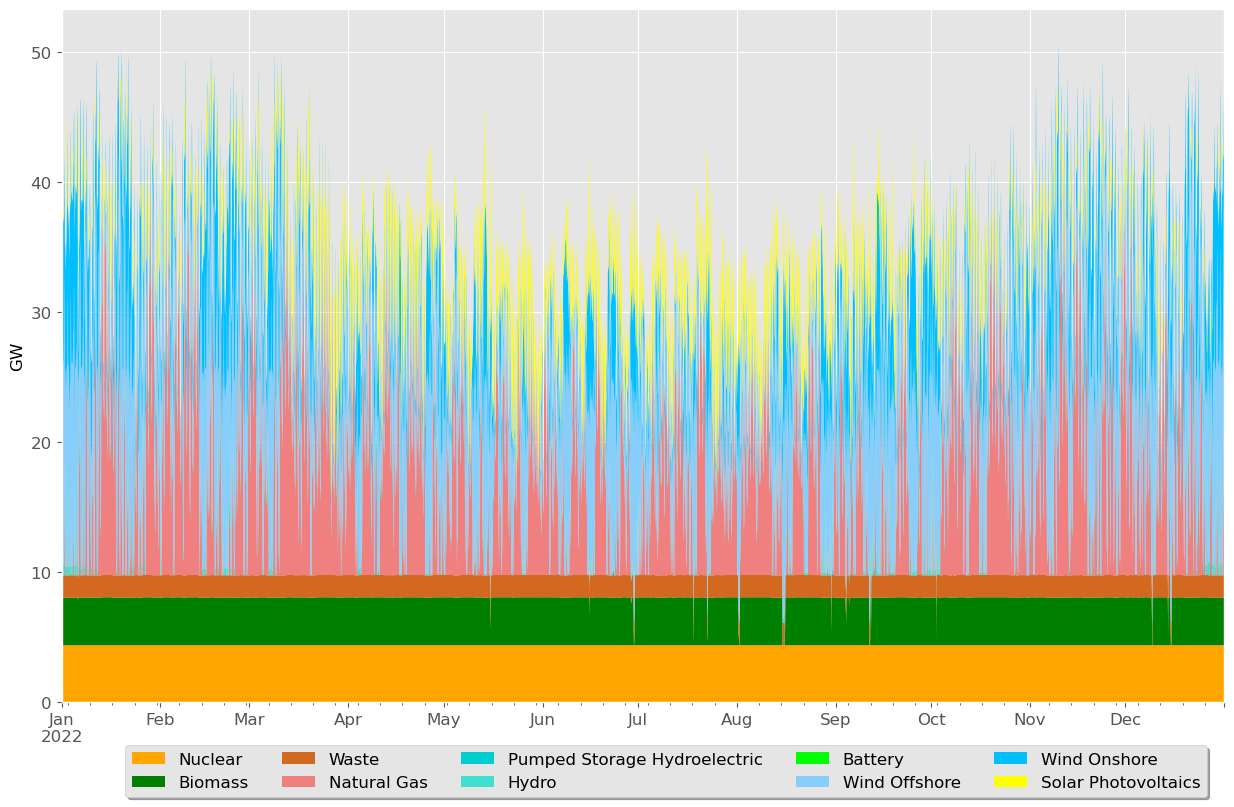

In [22]:
#cols = ["Nuclear", 'Biomass',
        #'Waste', "Oil", "Natural Gas",
       # 'Hydrogen', 'CCS Gas', 'CCS Biomass',
        #"Pumped Storage Hydroelectric", 'Hydro',
        #'Battery', 'Compressed Air', 'Liquid Air',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import', 'Unmet Load'
       # ]
# ignore the import/export since the the highvoltage links are disrgearded

cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
         'Unmet Load'
        ]




p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
# (interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# # rescale the y axis
# ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

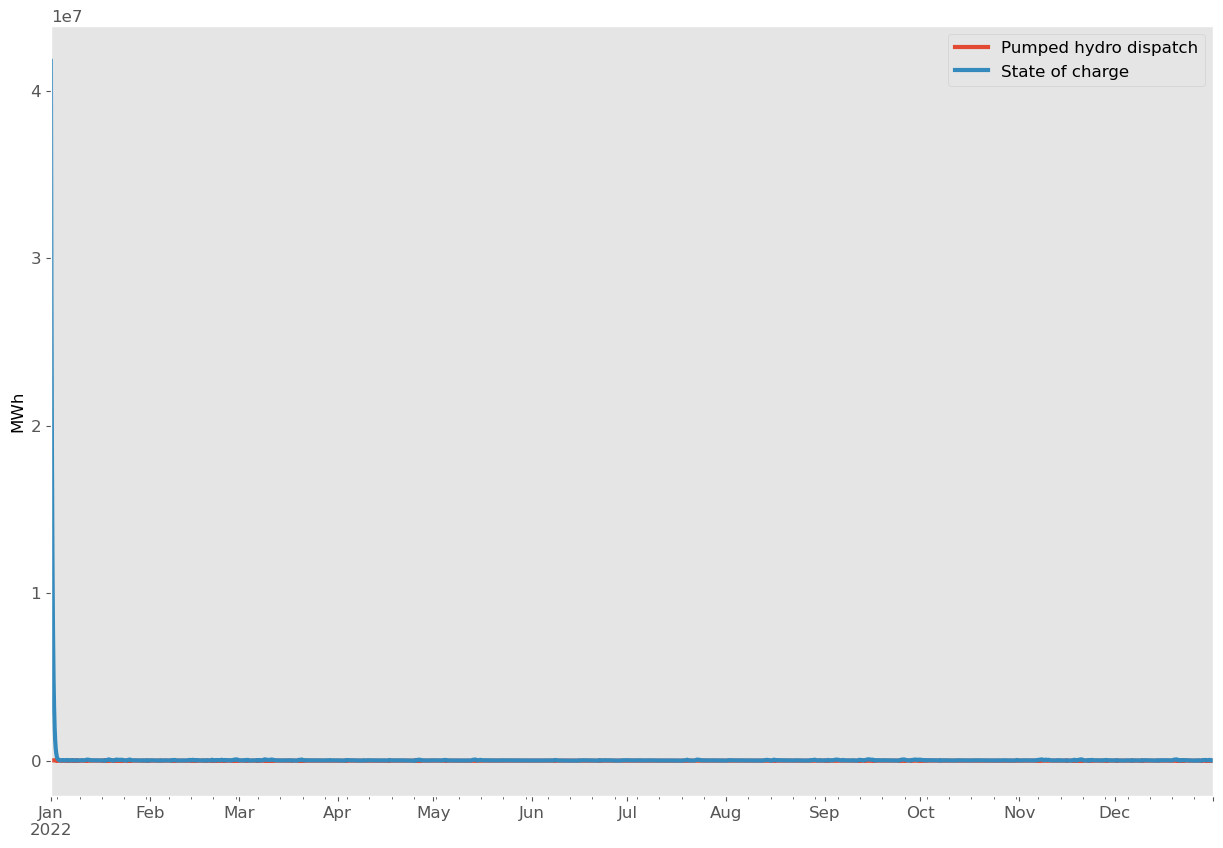

In [23]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

## Plotting line loading

Look at the line loading stats and graph...

In [24]:
now = network.snapshots[60]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    99.000000
mean      0.284005
std       0.557357
min      -0.700000
25%      -0.073290
50%       0.700000
75%       0.700000
max       0.700000
dtype: float64

(<matplotlib.collections.PatchCollection at 0x1984797f970>,
 <matplotlib.collections.LineCollection at 0x198479abc40>)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


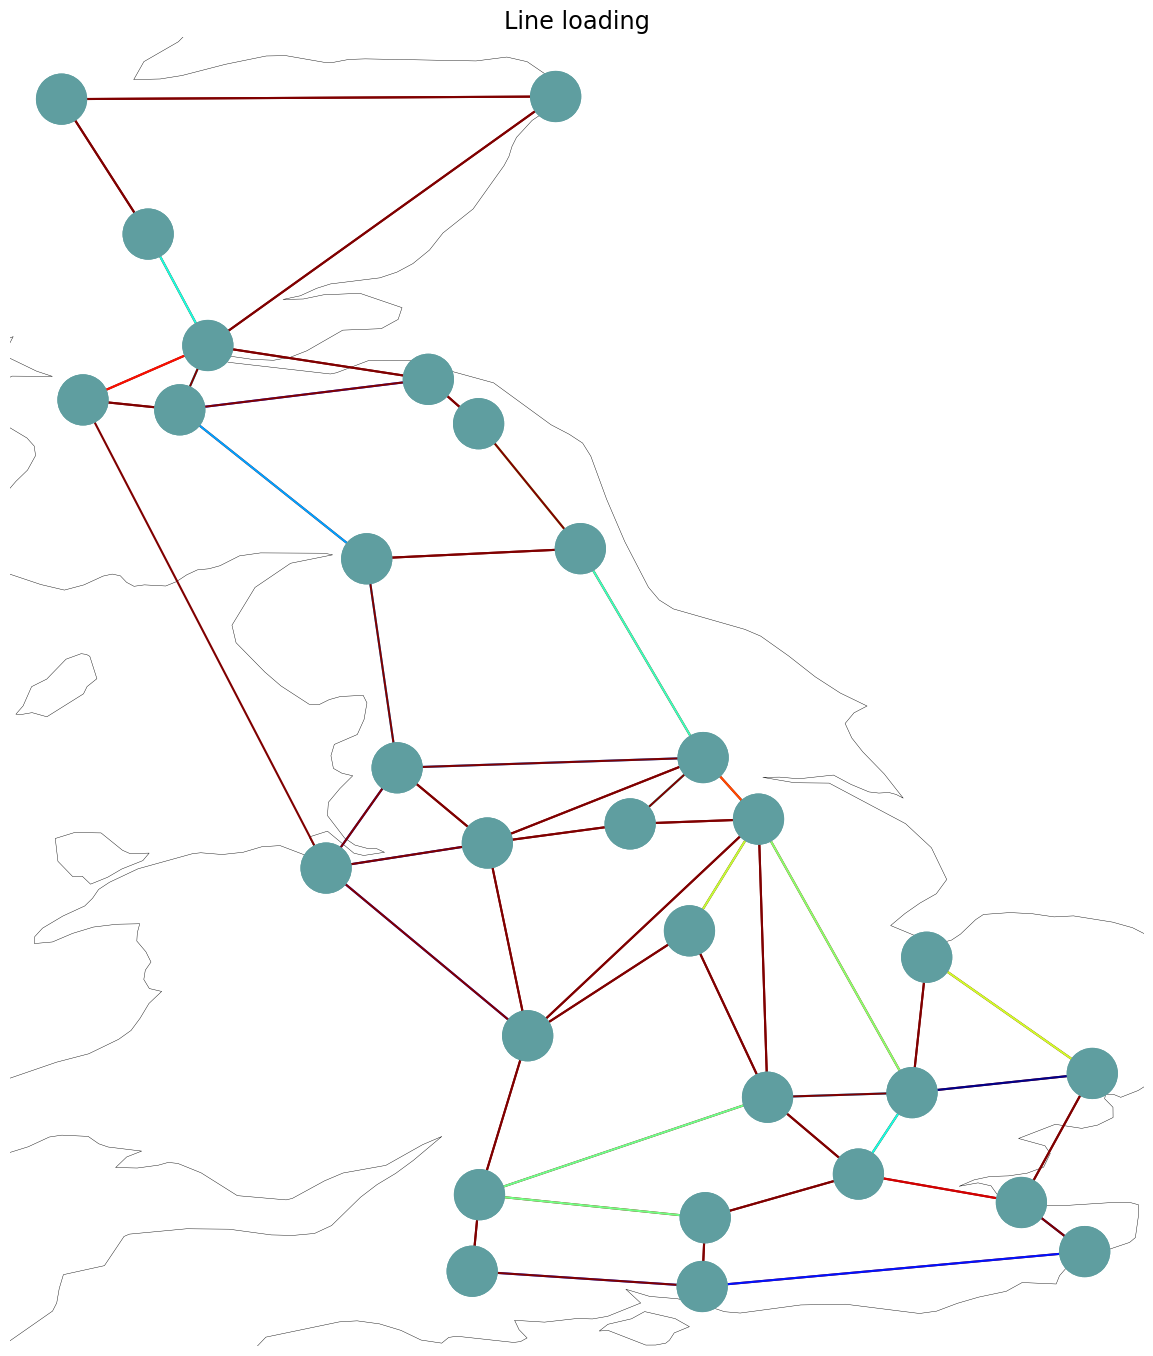

In [25]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

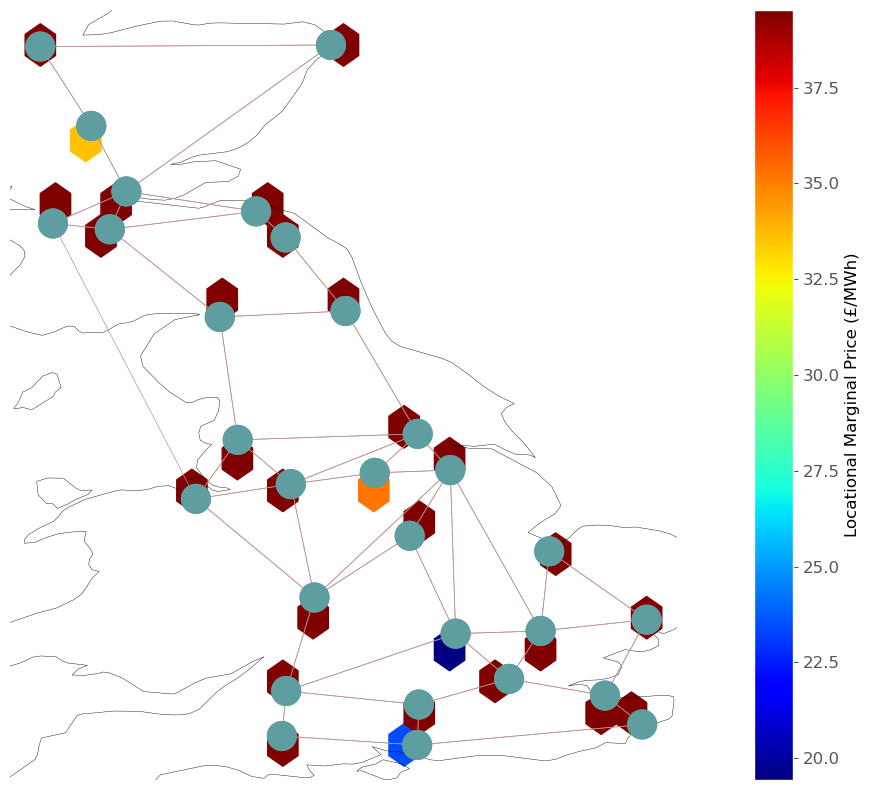

In [26]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [27]:
network.buses_t.marginal_price

,Eccles,Errochty,Heat Bus 1,Heat Bus 10,Heat Bus 11,Heat Bus 12,Heat Bus 13,Heat Bus 14,Heat Bus 15,Heat Bus 16,...,Th. Marsh/Stocksbridge,Bramford,Beauly,Penwortham,Denny/Bonnybridge,Harker,Pelham,Neilston,Peterhead,Bramley
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,54.920000,54.920000,0.000000,20.0,20.000000,19.869754,19.934664,20.0,20.0,20.0,...,54.920000,54.920000,0.000000,54.920000,54.920000,54.920000,54.920000,54.920000,0.000000,54.920000
2022-01-01 01:00:00,54.740000,54.740000,0.000000,20.0,20.000000,20.000000,19.869328,20.0,20.0,20.0,...,54.740000,54.740000,0.000000,54.740000,54.740000,54.740000,54.740000,54.740000,0.000000,54.740000
2022-01-01 02:00:00,54.470000,54.470000,0.000000,20.0,20.000000,20.000000,19.771325,20.0,20.0,20.0,...,54.470000,54.470000,0.000000,54.470000,54.470000,54.470000,54.470000,54.470000,0.000000,54.470000
2022-01-01 03:00:00,54.200000,54.200000,0.000000,20.0,19.868035,19.482387,19.673321,20.0,20.0,20.0,...,54.200000,54.200000,0.000000,54.200000,54.200000,54.200000,54.200000,54.200000,0.000000,54.200000
2022-01-01 04:00:00,54.290000,54.290000,0.000000,20.0,20.000000,19.514738,19.705989,20.0,20.0,20.0,...,54.290000,54.290000,0.000000,54.290000,54.290000,54.290000,54.290000,54.290000,0.000000,54.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,70.826725,70.826725,15.390000,20.0,20.000000,20.000000,20.000000,20.0,20.0,20.0,...,70.826725,70.826725,33.951457,70.826725,70.826725,70.826725,70.826725,70.826725,33.951457,70.826725
2022-12-31 20:00:00,70.826725,70.826725,20.000000,20.0,20.000000,20.000000,20.000000,20.0,20.0,20.0,...,70.826725,70.826725,44.300000,70.826725,70.826725,70.826725,70.826725,70.826725,44.300000,70.826725
2022-12-31 21:00:00,70.826725,70.826725,15.577598,20.0,20.000000,20.000000,20.000000,20.0,20.0,20.0,...,70.826725,70.826725,34.504380,70.826725,70.826725,70.826725,70.826725,70.826725,34.504380,70.826725


## Plotting curtailment

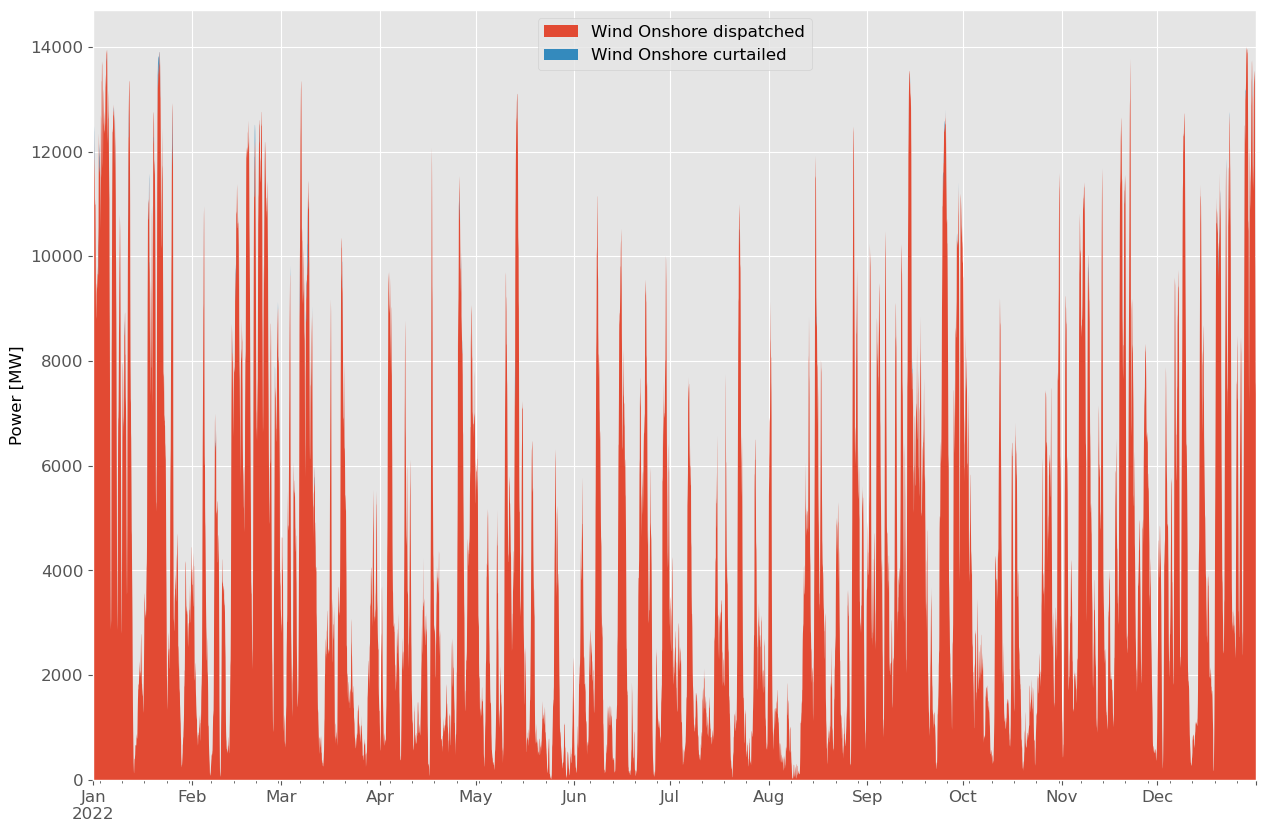

In [28]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

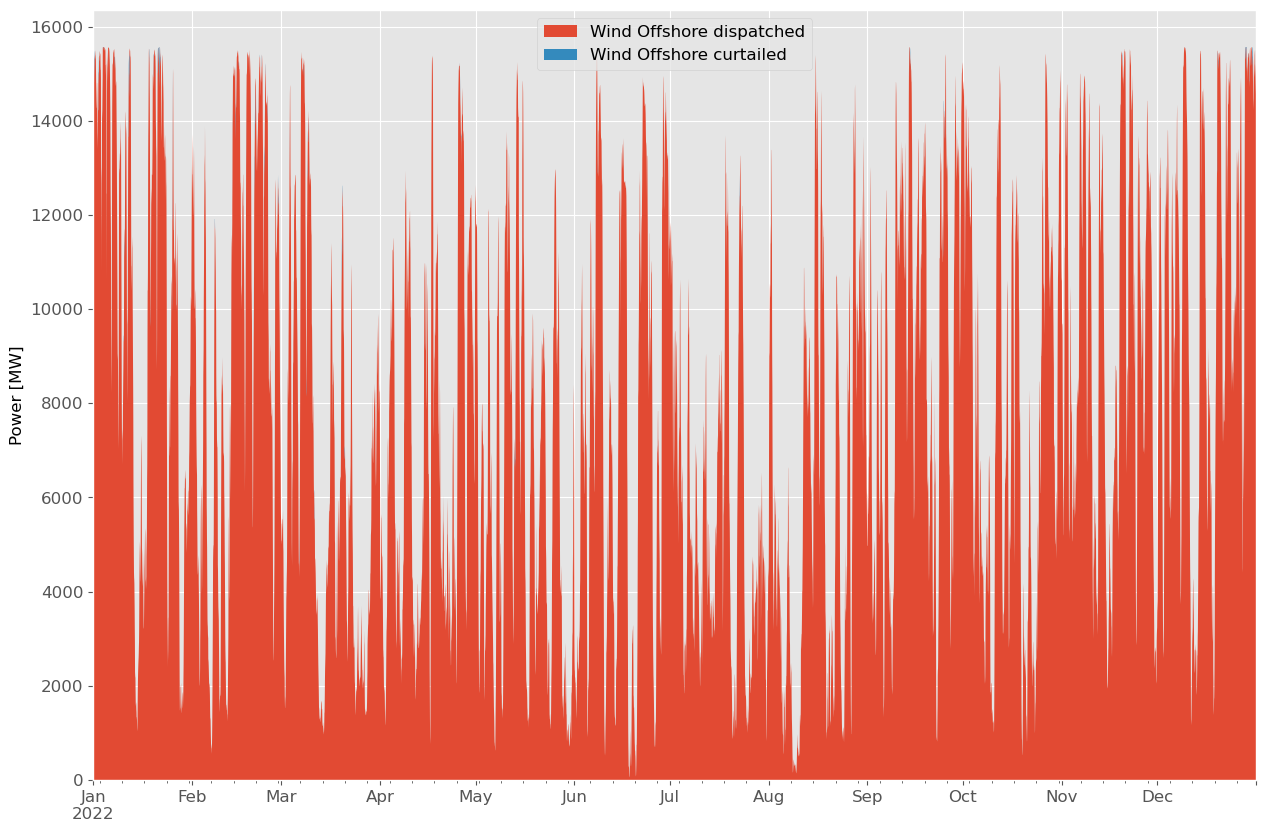

In [29]:
carrier = "Wind Offshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Offshore curtailed"][p_df["Wind Offshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

In [ ]:
My_network.export_to_csv_folder('LOPF_data_heat_2022/exports')